# Домашнее задание по занатию 16

Задание:
* Обучить логистическую регрессию. 
* Выбрать из возможных вариантов преобразования признаков и регуляризаций наилучшую модель.

## Импорт библиотек и загрузка данных

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [80]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=names)

In [81]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [82]:
# проверяем тип данных и данные на пустые значения

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [83]:
# меняем тип данных

col_1 = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "Age", "Outcome"]
col_2 = ["BMI", "DiabetesPedigreeFunction"]

for c in col_1:
    data[c] = data[c].astype("int32")

for c in col_2:
    data[c] = data[c].astype("float32")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int32  
 1   Glucose                   768 non-null    int32  
 2   BloodPressure             768 non-null    int32  
 3   SkinThickness             768 non-null    int32  
 4   Insulin                   768 non-null    int32  
 5   BMI                       768 non-null    float32
 6   DiabetesPedigreeFunction  768 non-null    float32
 7   Age                       768 non-null    int32  
 8   Outcome                   768 non-null    int32  
dtypes: float32(2), int32(7)
memory usage: 27.1 KB


In [84]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992579,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884162,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.299999,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.599998,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.099998,2.420000,81.000000,1.000000


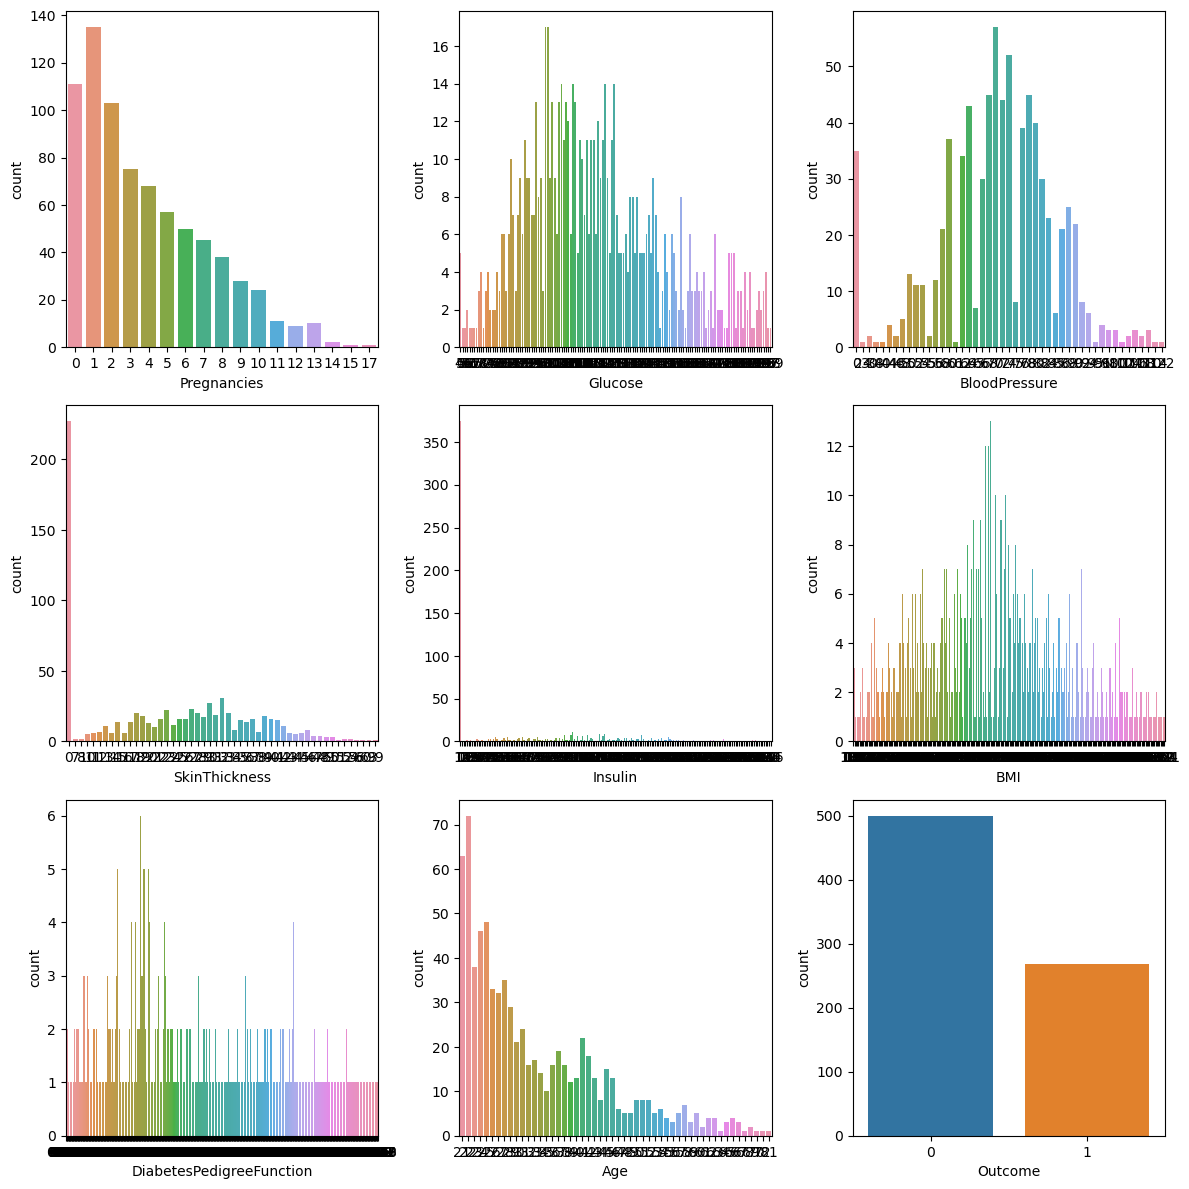

In [85]:
# посторим графики посмотреть распределение признаков

n_row = 3
n_col = 3

fig, axes = plt.subplots(n_row, n_col, figsize = (n_col*4, n_row*4))

for i, ax in enumerate(fig.axes):
    #cat_i = i//2
    sns.countplot(x=data.columns[i], data=data, ax=ax)
    
fig.tight_layout()
plt.show()

In [86]:
# строим матрицу корреляции, посмотреть корреляцию фич относительно тергета и между собой

data.corr().sort_values(by='Outcome', ascending=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068


In [87]:
# разделим данные на тренирововчный и тестовый датасеты
data_features = data[[name for name, values in data.items() if name not in ['Outcome']]]
data_target = data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.55,random_state=42)

## Обучаем модель и делаем предсказание

### Без преобразований

In [100]:
for i in range(1, 3):
    penalty = 'l' + str(i)
    log_reg = LogisticRegression(penalty= penalty, C=1.0, solver='liblinear')
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    
    print(f'RMSE for penalty {penalty}: {metrics.mean_squared_error(y_test, y_pred, squared=False)}')
    print(f'Accuracy for penalty {penalty}: {metrics.accuracy_score(y_test, y_pred)}')
    print(f'Report\n{metrics.classification_report(y_test, y_pred)}\n')


RMSE for penalty l1: 0.46867171793351414
Accuracy for penalty l1: 0.7803468208092486
Report
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       228
           1       0.69      0.64      0.66       118

    accuracy                           0.78       346
   macro avg       0.76      0.75      0.75       346
weighted avg       0.78      0.78      0.78       346


RMSE for penalty l2: 0.4561715527618233
Accuracy for penalty l2: 0.791907514450867
Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       228
           1       0.73      0.63      0.67       118

    accuracy                           0.79       346
   macro avg       0.77      0.75      0.76       346
weighted avg       0.79      0.79      0.79       346




### MinMaxScaler

In [89]:
# импортируем метод и преобразуем данные
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_mms, X_test_mms = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns), pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [90]:
X_train_mms.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,0.221773,0.611660,0.576296,0.330324,0.095000,0.541721,0.173188,0.199210
std,0.191989,0.159266,0.134288,0.246221,0.137967,0.118961,0.153245,0.191801
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.524590,0.000000,0.000000,0.456650,0.071520,0.050000
50%,0.176471,0.592965,0.590164,0.365079,0.045508,0.538721,0.133219,0.133333
75%,0.352941,0.702261,0.655738,0.507937,0.153664,0.614478,0.235269,0.316667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
for i in range(1, 3):
    penalty = 'l' + str(i)
    log_reg = LogisticRegression(penalty= penalty, C=1.0, solver='liblinear')
    log_reg.fit(X_train_mms, y_train)
    y_pred = log_reg.predict(X_test_mms)
    
    print(f'RMSE for penalty {penalty}: {metrics.mean_squared_error(y_test, y_pred, squared=False)}')
    print(f'Accuracy for penalty {penalty}: {metrics.accuracy_score(y_test, y_pred)}')
    print(f'Report\n{metrics.classification_report(y_test, y_pred)}\n')

RMSE for penalty l1: 0.46867171793351414
Accuracy for penalty l1: 0.7803468208092486
Report
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       228
           1       0.71      0.60      0.65       118

    accuracy                           0.78       346
   macro avg       0.76      0.74      0.75       346
weighted avg       0.78      0.78      0.78       346


RMSE for penalty l2: 0.4747984056539793
Accuracy for penalty l2: 0.7745664739884393
Report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       228
           1       0.73      0.54      0.62       118

    accuracy                           0.77       346
   macro avg       0.76      0.72      0.73       346
weighted avg       0.77      0.77      0.77       346




### PowerTransformer

In [92]:
# импортируем метод и преобразуем данные
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson').fit(X_train)
X_train_pt, X_test_pt = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns), pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)


In [93]:
X_train_pt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,4.220000e+02,4.220000e+02,4.220000e+02,4.220000e+02,4.220000e+02,4.220000e+02,4.220000e+02,4.220000e+02
mean,1.725844e-16,-3.830533e-16,1.683751e-17,8.418753e-18,-1.262813e-16,-1.557469e-16,-3.283314e-16,3.067109e-14
std,1.001187e+00,1.001187e+00,1.001187e+00,1.001187e+00,1.001187e+00,1.001187e+00,1.001187e+00,1.001187e+00
min,-1.624206e+00,-4.151533e+00,-3.115014e+00,-1.476586e+00,-1.024156e+00,-4.195771e+00,-2.076848e+00,-1.480689e+00
25%,-8.429378e-01,-7.101960e-01,-5.456739e-01,-1.476586e+00,-1.024156e+00,-7.250578e-01,-7.568056e-01,-8.403597e-01
50%,4.172617e-02,-1.060682e-01,1.944473e-02,3.228358e-01,4.897206e-01,-3.720133e-02,-5.266461e-03,-7.974228e-02
75%,8.406845e-01,5.757875e-01,6.304565e-01,7.475191e-01,9.659285e-01,6.073686e-01,7.992636e-01,8.958329e-01
max,2.384940e+00,2.392613e+00,4.543401e+00,1.917411e+00,1.689939e+00,4.000032e+00,2.316719e+00,2.115322e+00


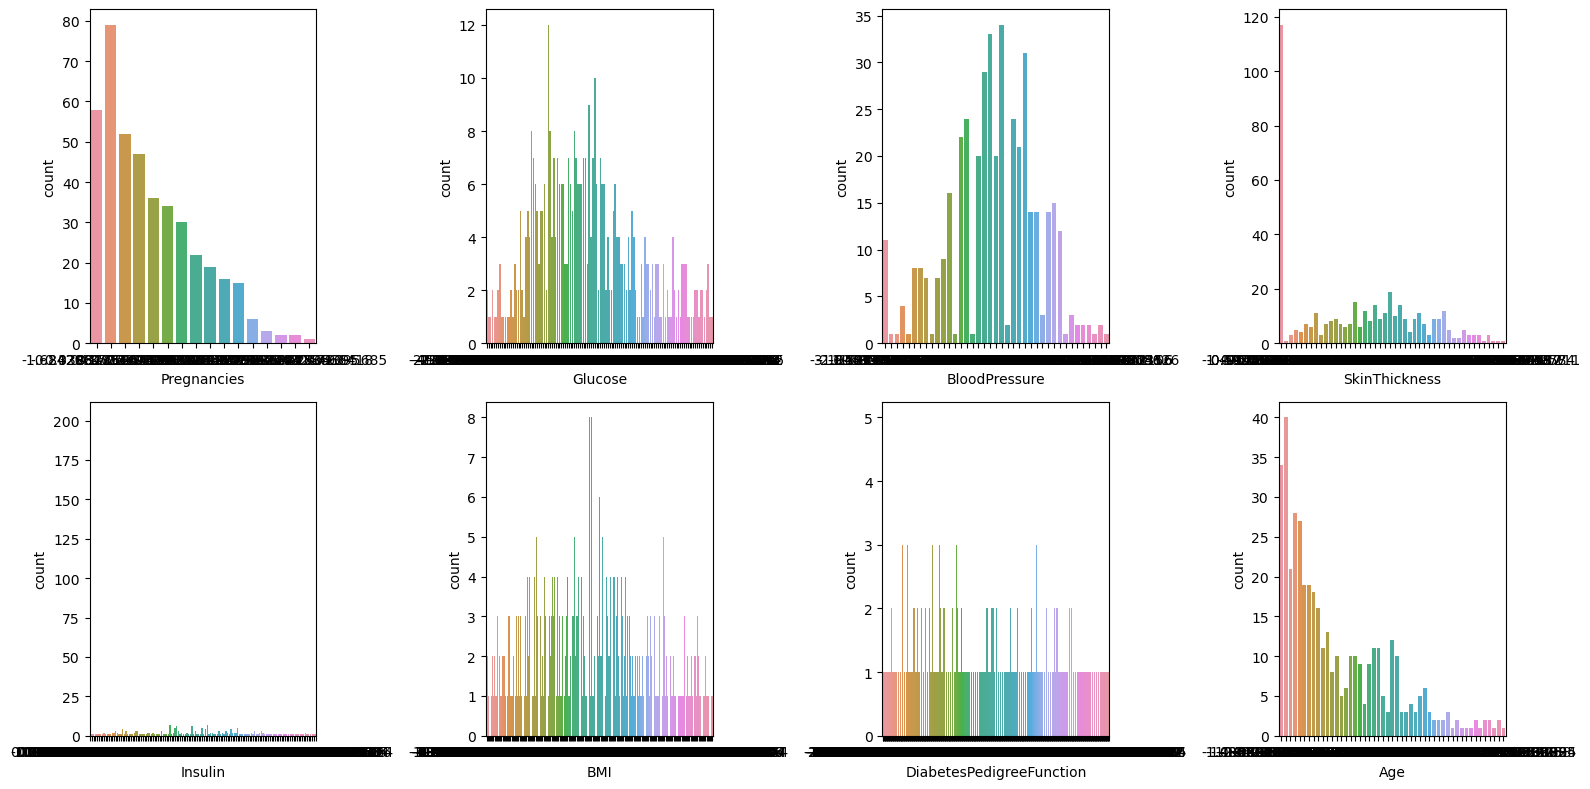

In [94]:
n_row = 2
n_col = 4

fig, axes = plt.subplots(n_row, n_col, figsize = (n_col*4, n_row*4))

for i, ax in enumerate(fig.axes):
    #cat_i = i//2
    sns.countplot(x=X_train_pt.columns[i], data=X_train_pt, ax=ax)
    
fig.tight_layout()
plt.show()

In [102]:
for i in range(1, 3):
    penalty = 'l' + str(i)
    log_reg = LogisticRegression(penalty= penalty, C=1.0, solver='liblinear')
    log_reg.fit(X_train_pt, y_train)
    y_pred = log_reg.predict(X_test_pt)
    
    print(f'MSE for penalty {penalty}: {metrics.mean_squared_error(y_test, y_pred, squared=False)}')
    print(f'Accuracy for penalty {penalty}: {metrics.accuracy_score(y_test, y_pred)}')
    print(f'Report\n{metrics.classification_report(y_test, y_pred)}\n')

MSE for penalty l1: 0.4717450080299272
Accuracy for penalty l1: 0.7774566473988439
Report
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       228
           1       0.68      0.65      0.67       118

    accuracy                           0.78       346
   macro avg       0.75      0.75      0.75       346
weighted avg       0.78      0.78      0.78       346


MSE for penalty l2: 0.4717450080299272
Accuracy for penalty l2: 0.7774566473988439
Report
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       228
           1       0.68      0.65      0.67       118

    accuracy                           0.78       346
   macro avg       0.75      0.75      0.75       346
weighted avg       0.78      0.78      0.78       346




### StandardScaler

In [96]:
# импортируем метод и преобразуем данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_ss, X_test_ss = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns), pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [97]:
X_train_ss.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,4.220000e+02,4.220000e+02,4.220000e+02,4.220000e+02,4.220000e+02,4.220000e+02,4.220000e+02,4.220000e+02
mean,1.010250e-16,1.241766e-16,3.157032e-16,-6.103596e-17,-2.104688e-17,-3.535876e-16,1.683751e-17,-1.683751e-16
std,1.001187e+00,1.001187e+00,1.001187e+00,1.001187e+00,1.001187e+00,1.001187e+00,1.001187e+00,1.001187e+00
min,-1.156504e+00,-3.845052e+00,-4.296573e+00,-1.343169e+00,-6.893871e-01,-4.559165e+00,-1.131483e+00,-1.039864e+00
25%,-8.497505e-01,-7.177191e-01,-3.854896e-01,-1.343169e+00,-6.893871e-01,-7.159619e-01,-6.642239e-01,-7.788676e-01
50%,-2.362437e-01,-1.175239e-01,1.033958e-01,1.413218e-01,-3.591455e-01,-2.524812e-02,-2.611257e-01,-3.438727e-01
75%,6.840164e-01,5.695417e-01,5.922812e-01,7.222096e-01,4.257142e-01,6.123339e-01,4.055903e-01,6.131160e-01
max,4.058303e+00,2.441203e+00,3.158930e+00,2.723045e+00,6.567349e+00,3.856918e+00,5.401777e+00,4.180074e+00


In [103]:
for i in range(1, 3):
    penalty = 'l' + str(i)
    log_reg = LogisticRegression(penalty= penalty, C=1.0, solver='liblinear')
    log_reg.fit(X_train_ss, y_train)
    y_pred = log_reg.predict(X_test_ss)
    
    print(f'RMSE for penalty {penalty}: {metrics.mean_squared_error(y_test, y_pred, squared=False)}')
    print(f'Accuracy for penalty {penalty}: {metrics.accuracy_score(y_test, y_pred)}')
    print(f'Report\n{metrics.classification_report(y_test, y_pred)}\n')

RMSE for penalty l1: 0.4655781414331506
Accuracy for penalty l1: 0.7832369942196532
Report
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       228
           1       0.70      0.64      0.67       118

    accuracy                           0.78       346
   macro avg       0.76      0.75      0.75       346
weighted avg       0.78      0.78      0.78       346


RMSE for penalty l2: 0.4717450080299272
Accuracy for penalty l2: 0.7774566473988439
Report
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       228
           1       0.69      0.64      0.66       118

    accuracy                           0.78       346
   macro avg       0.75      0.74      0.75       346
weighted avg       0.77      0.78      0.78       346


